**Import the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle


**Data Loading And Understanding**



Exploratory Data Analysis


In [ ]:
df = pd.read_csv('/content/train.csv');



In [ ]:
df.shape

(800, 22)

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.tail()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
pd.set_option( 'display.max_columns',None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df["age"] = df["age"].astype(int)

In [ ]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [ ]:
for col in df.columns:
   numerical_features = ["ID","age","result"]
   if col not in numerical_features:
      print(col,df[col].unique())
      print("-" *50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
df = df.drop(columns = ["ID","age_desc"])

In [ ]:
df.shape

(800, 20)

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [ ]:
#target class distribution

df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


Insights
1. missing values in ethenicity and relation column
2. age_desc column has only one unique value as it is removed because it is not important for prediction
3. identified class imbalance in the target column
4.fiixed country names


In [ ]:
df.shape

(800, 20)

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Univariate variables


Numerical columns
  

*   age
*   result







In [ ]:
 # set the desired theme
sns.set_theme(style="darkgrid")


Median Age: 24.0
Mean Age: 27.96375


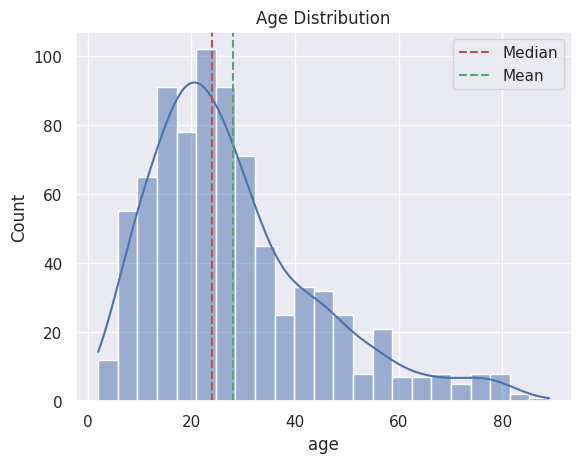

In [ ]:
sns.histplot(df["age"],kde=True)
plt.title("Age Distribution")

# calculate mean and median
age_median = df["age"].median()
age_mean = df["age"].mean()

print("Median Age:", age_median)
print("Mean Age:", age_mean)

plt.axvline(age_median, color='r', linestyle='--', label='Median')
plt.axvline(age_mean, color='g', linestyle='--', label='Mean')
plt.legend()
plt.show()

Median: 9.605299308
Mean : 8.537303106501248


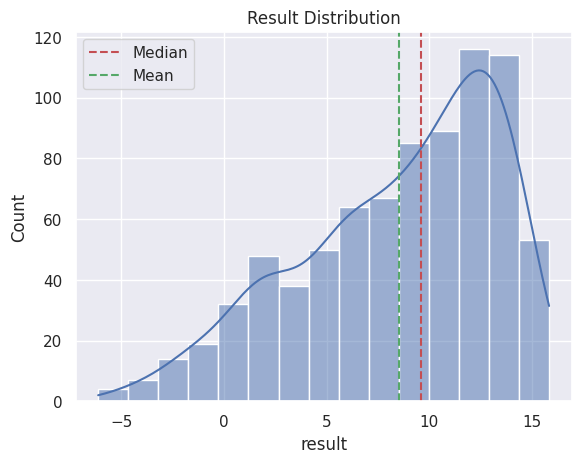

In [ ]:
sns.histplot(df["result"],kde=True)
plt.title("Result Distribution")

# calculate mean and median
result_median = df["result"].median()
result_mean = df["result"].mean()

print("Median:", result_median)
print("Mean :", result_mean)

plt.axvline(result_median, color='r', linestyle='--', label='Median')
plt.axvline(result_mean, color='g', linestyle='--', label='Mean')
plt.legend()
plt.show()

Box Plots for identifying outliers for numerical columns


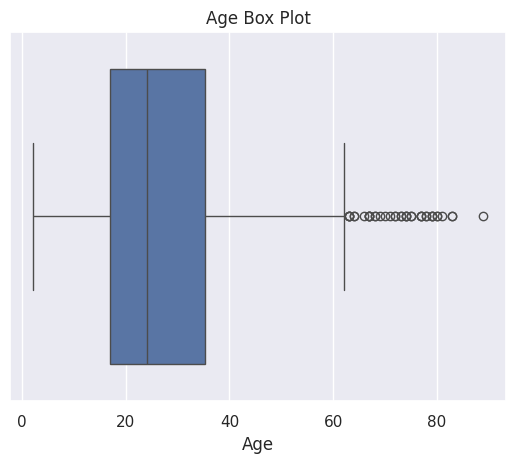

In [ ]:
sns.boxplot(x=df["age"])
plt.title("Age Box Plot")
plt.xlabel("Age")
plt.show()

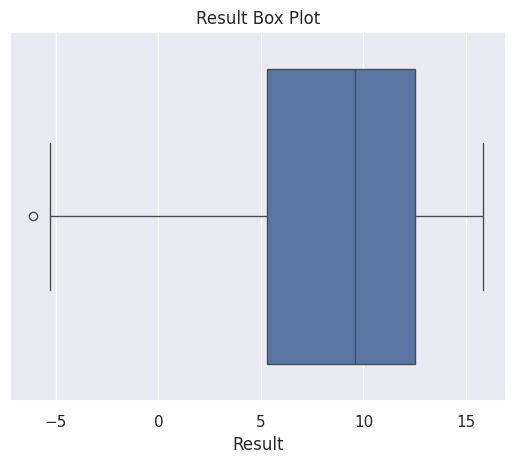

In [ ]:
sns.boxplot(x=df["result"])
plt.title("Result Box Plot")
plt.xlabel("Result")
plt.show()

In [ ]:
#count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_age = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
len(outliers_age)


39

In [ ]:
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_result = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]
print(len(outliers_result))

1


univariate analysis of categorical columns

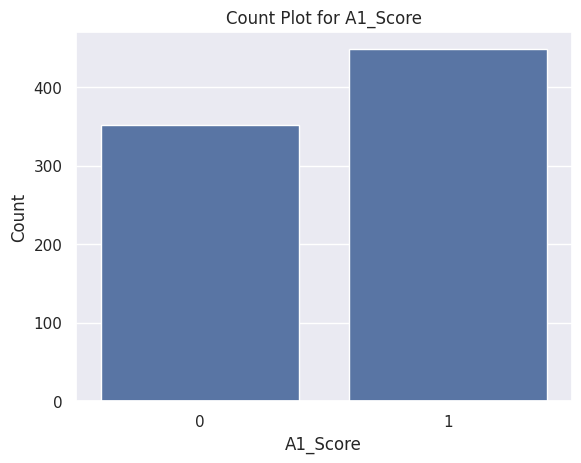

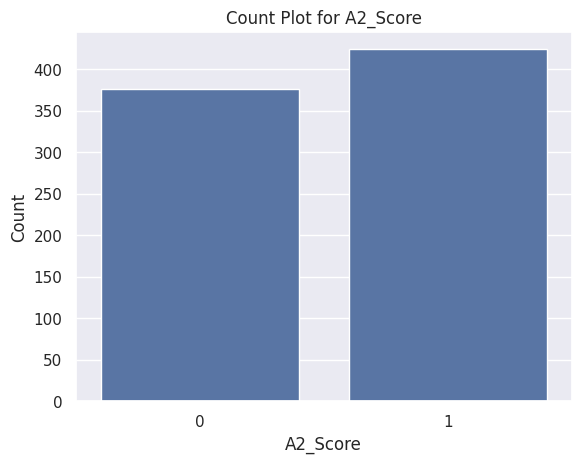

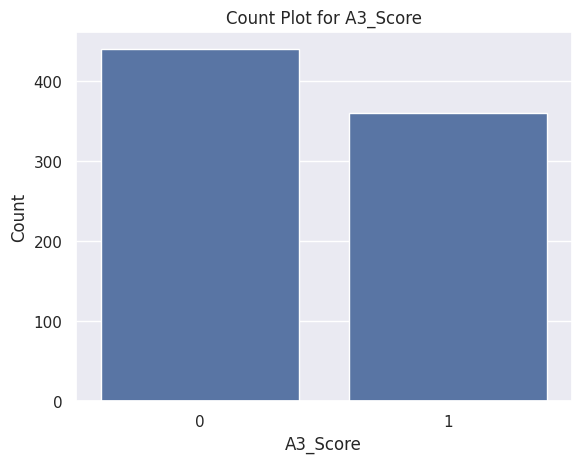

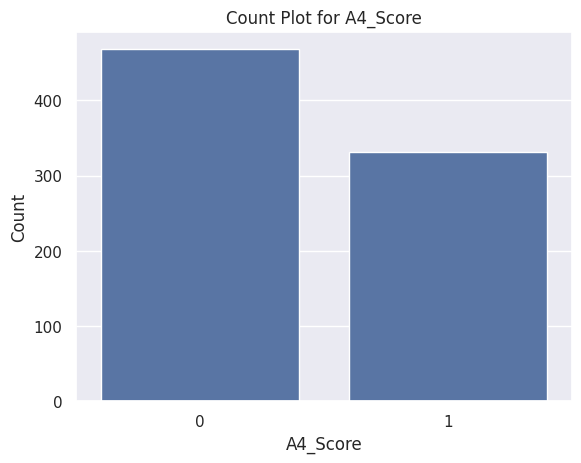

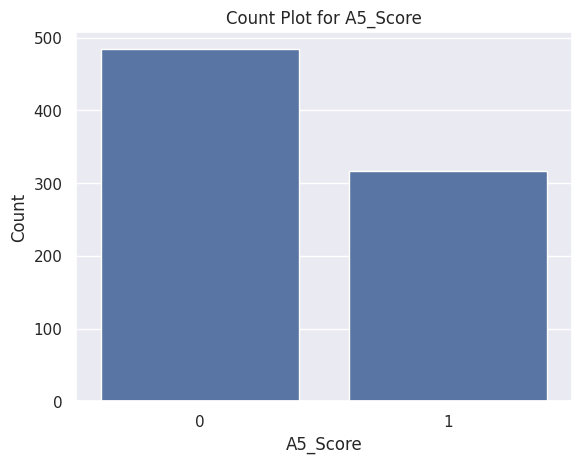

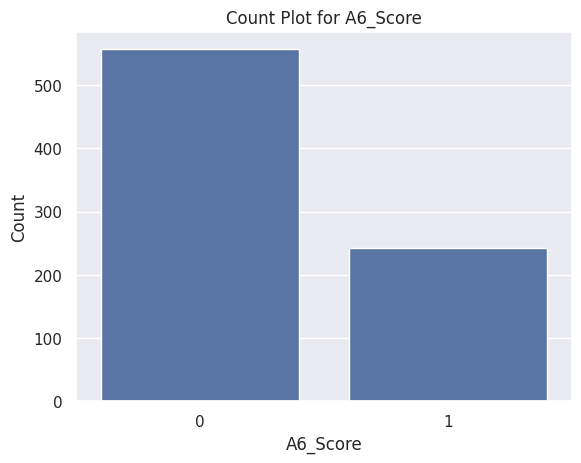

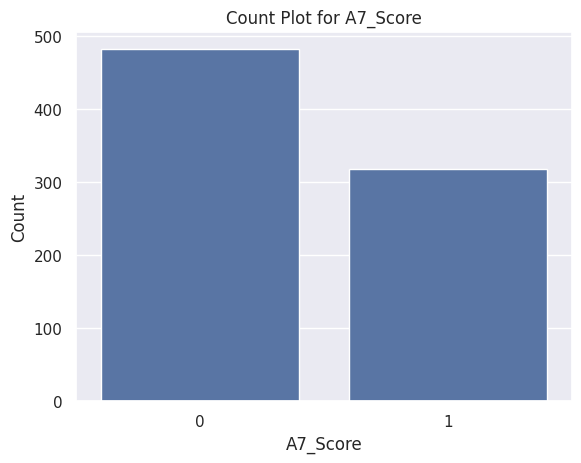

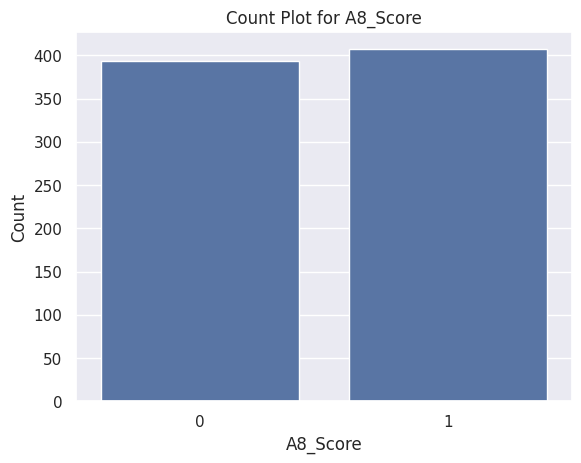

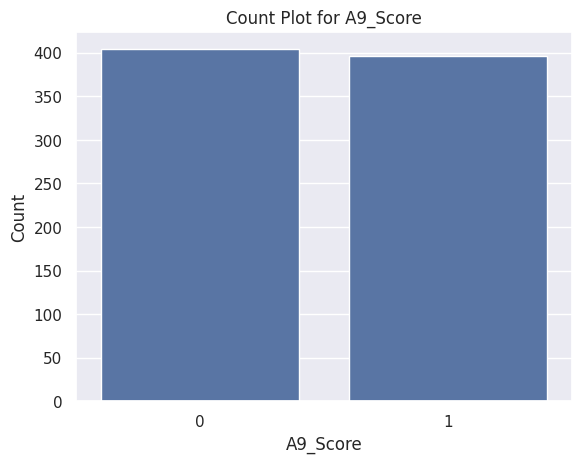

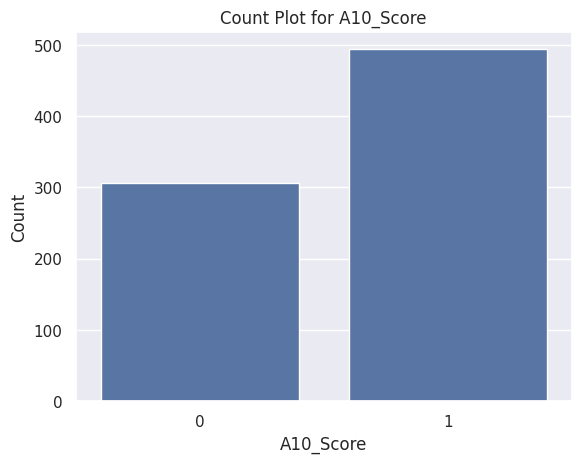

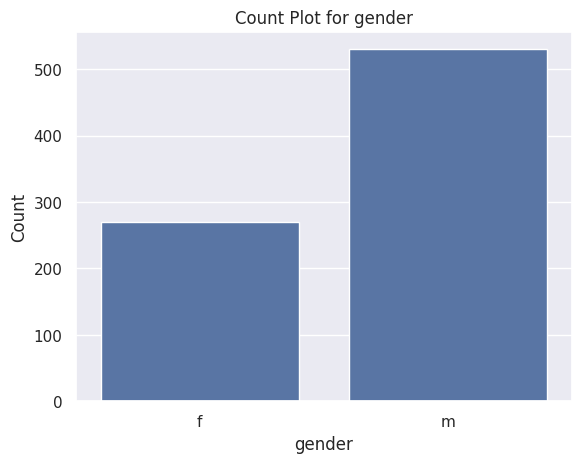

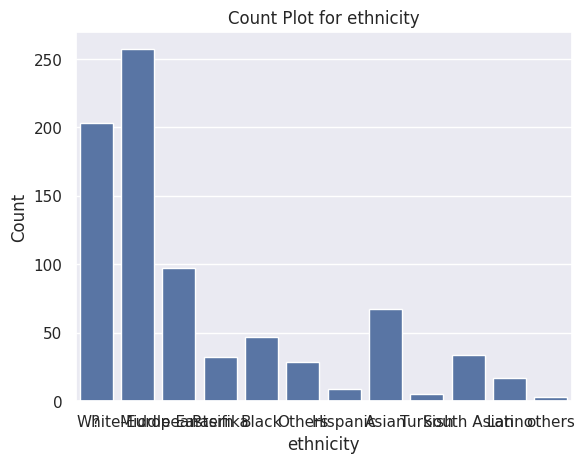

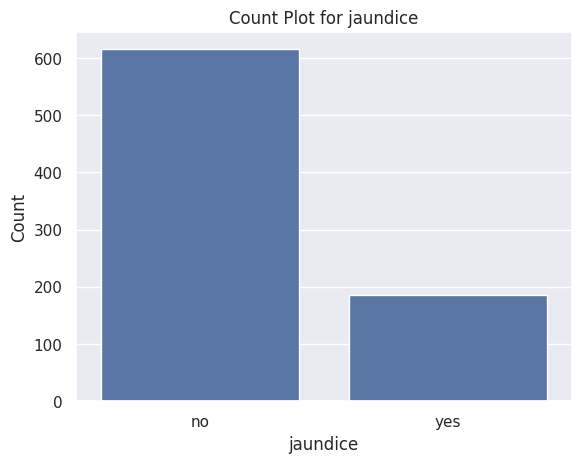

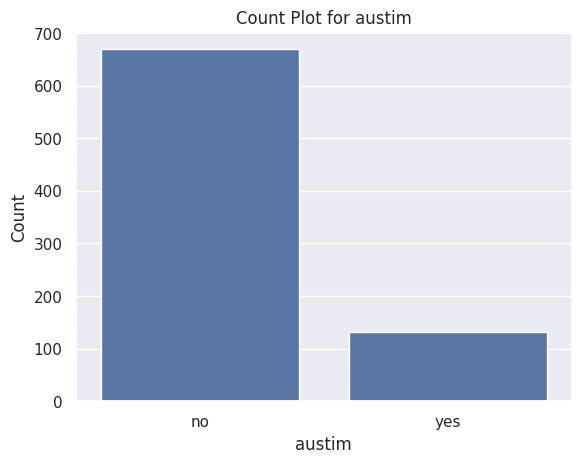

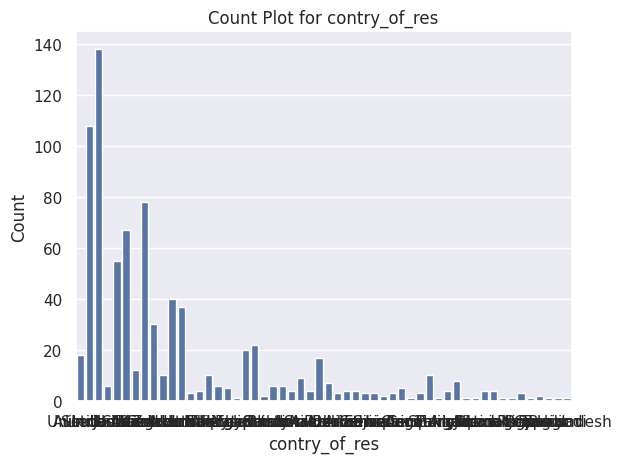

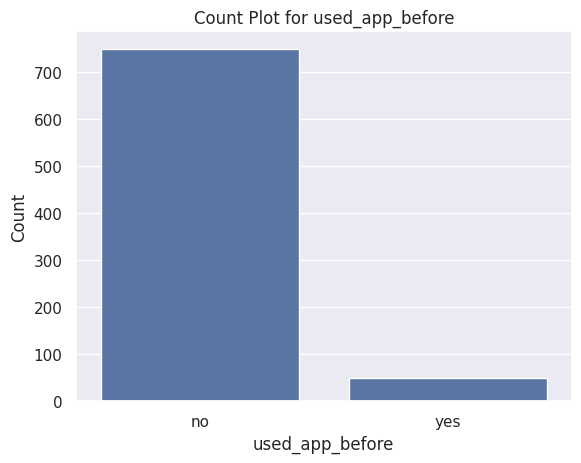

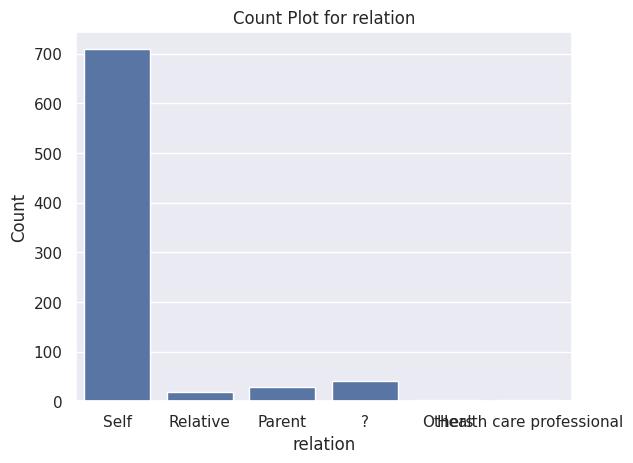

In [ ]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()



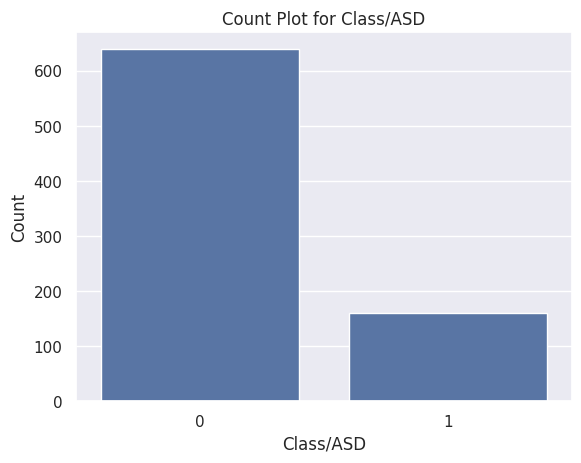

In [ ]:
#countplot for target column
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [ ]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


Handle missing values in ethnicity and relation column

In [ ]:
df["ethnicity"] = df["ethnicity"].replace({"?":"Others","others":"Others"})


In [ ]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [ ]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [ ]:
df["relation"] = df["relation"].replace({
    "?" : "Others",
    "Relative" : "Others",
    "Parent" : "Others",
    "Health care professional" : "Others"
})

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


Label Encoding

In [ ]:
# Identify columns with "object" data type
object_columns = df.select_dtypes(include=['object']).columns


In [ ]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
#initialize a dictionory to store encoders
encoders = {}

#apply label encoders to store the encoders
for col in object_columns:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])
  encoders[col] = encoder

#save tge encoders as a pickle file
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)


In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


Bivariate Analysis


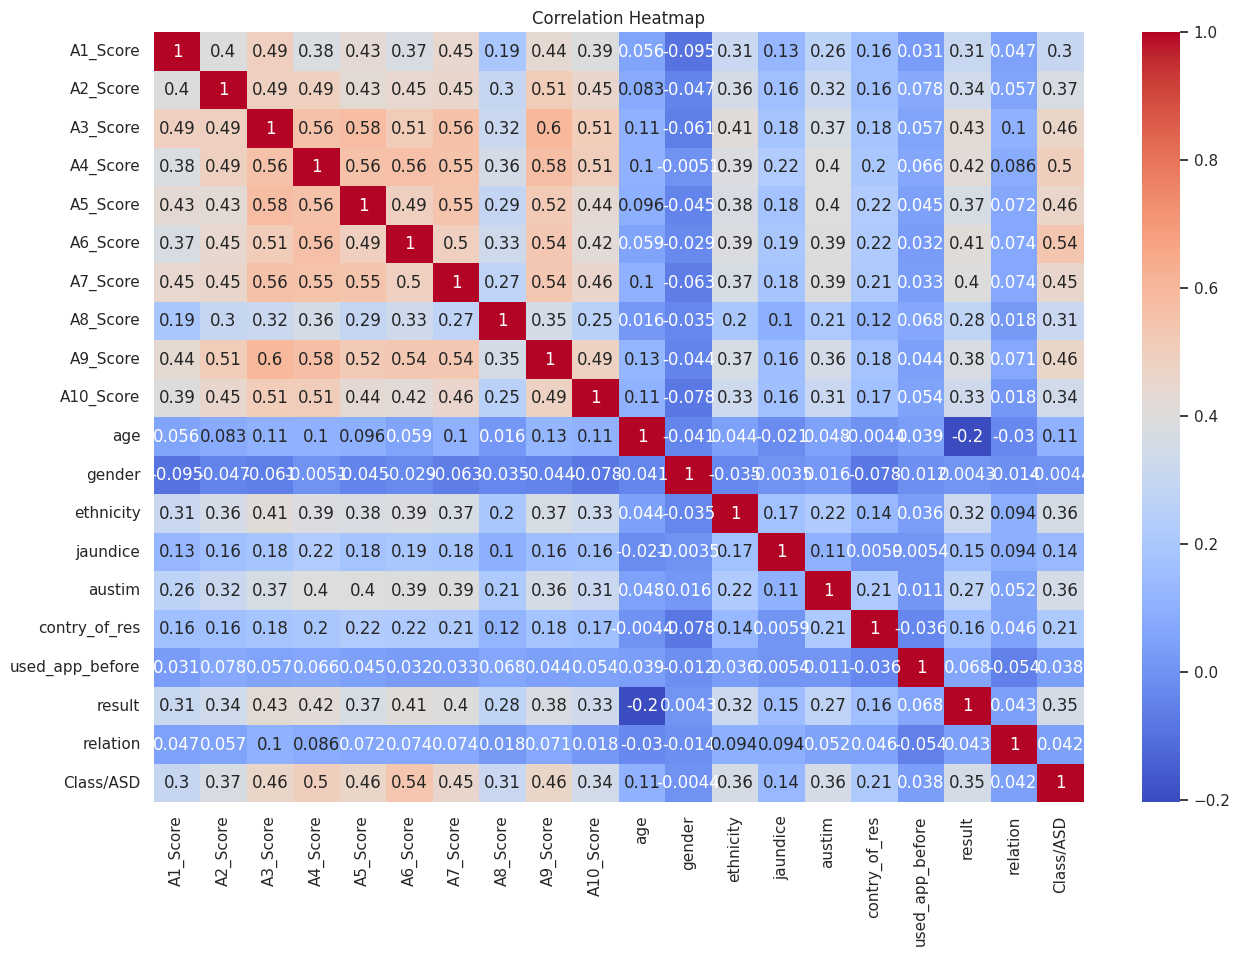

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 Insights from Exploratory Data Analysis (EDA)
1 There are a few outliers in the numerical columns such as age and result.

2 There is class imbalance in the target column (austim), which may affect model performance.

3 Several categorical features also exhibit class imbalance (e.g., gender, ethnicity).

4 No features show high correlation with each other — reducing multicollinearity concerns.

5 Label encoding was applied to categorical variables, and the encoders were saved using pickle for future use (e.g., model deployment).

**Data Preprocessing**

Handling Outliers

In [ ]:
#function to replace outliers with median

def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    df["column"] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df


In [ ]:
# replace outliers in age column
df = replace_outliers_with_median(df, "age")


# replace outliers in result column
df = replace_outliers_with_median(df, "result")




In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD,column
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0,6.351166
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0,2.255185
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1,14.851484
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0,2.276617
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0,-4.777286


In [ ]:
df.shape

(800, 21)

**Train test split**

In [ ]:
x = df.drop(columns = ["Class/ASD"])
y = df["Class/ASD"]

In [ ]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score  age  gender  ethnicity  jaundice  austi

In [ ]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [ ]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [ ]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


In [ ]:
smote = SMOTE(random_state = 42)

In [ ]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


In [ ]:
print(y_train_smote.shape)

(1030,)


In [ ]:
print(y_train_smote.value_counts())


Class/ASD
1    515
0    515
Name: count, dtype: int64


** Model Training**

In [ ]:
#list of classifiers

models = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "XGBoost" : XGBClassifier(random_state=42)
}


In [ ]:
#dictionory to store cross val store

cv_scores = {}

for( model_name,model) in models.items():
  print(f"Training {model_name} with default parametres...")
  scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring = "accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross Validation Accuracy : {np.mean(scores):.2f}")
  print("-"*50)


Training Random Forest with default parametres...
Random Forest Cross Validation Accuracy : 0.90
--------------------------------------------------
Training Decision Tree with default parametres...
Decision Tree Cross Validation Accuracy : 0.85
--------------------------------------------------
Training XGBoost with default parametres...
XGBoost Cross Validation Accuracy : 0.90
--------------------------------------------------


In [ ]:
cv_scores

{'Random Forest': array([0.87864078, 0.9223301 , 0.90291262, 0.91747573, 0.89320388]),
 'Decision Tree': array([0.79126214, 0.84951456, 0.85436893, 0.88349515, 0.8592233 ]),
 'XGBoost': array([0.82038835, 0.92718447, 0.91747573, 0.90291262, 0.9223301 ])}

**Model Selection And Hyperparametre tuning**

In [ ]:
# Initializing models

decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [ ]:
#hyperparametre grids for randomized search CV

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200,500],
    'max_depth' : [3,5,7,10],
    'learning_rate' : [0.01,0.1,0.2,0.3],
    'subsample' : [0.5,0.7,1],
    'colsample_bytree' : [0.5,0.7,1]
}


In [ ]:
#hyperparametre tuning for 3 tree based models

#the below steps can be automated by using for loop or by using a pipeline

#perform Randomized Search for each model

random_search_dt = RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring='accuracy',random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring='accuracy',random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring='accuracy',random_state=42)


In [ ]:
random_search_dt.fit(X_train_smote,y_train_smote)
random_search_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/pytho

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [ ]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
0.8601941747572817
RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)
0.9058252427184467
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, min_samples_leaf=2, min_samples_split=5,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=None, ...)
0.8980582524271845


In [ ]:
# Get the model with best score

best_model = None
best_score = 0;
if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_


In [ ]:
best_model

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [ ]:
best_score

np.float64(0.9058252427184467)

In [ ]:
print(X_train_smote.columns.tolist())

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'relation', 'column']


In [ ]:
#evaluate on test data
y_test_pred = best_model.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix",confusion_matrix(y_test,y_test_pred))
print("Classification Report",classification_report(y_test,y_test_pred))

Accuracy Score 0.8125
Confusion Matrix [[104  20]
 [ 10  26]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.84      0.87       124
           1       0.57      0.72      0.63        36

    accuracy                           0.81       160
   macro avg       0.74      0.78      0.75       160
weighted avg       0.83      0.81      0.82       160



In [ ]:
model_data = {"model": best_model, "features_names": x.columns.tolist()}


with open("best_model_pkl", "wb") as f:
  pickle.dump(model_data, f)

**Model Evaluation**

Predictive System

In [ ]:
with open("best_model_pkl","rb") as f:
  model_data = pickle.load(f)

label_model = model_data["model"]
feature_names = model_data["features_names"]



In [ ]:
label_model


RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [ ]:
feature_names

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'result',
 'relation',
 'column']

In [ ]:
# Check what features the model was trained with
print("Model expects these features:", label_model.feature_names_in_)

Model expects these features: ['A1_Score' 'A2_Score' 'A3_Score' 'A4_Score' 'A5_Score' 'A6_Score'
 'A7_Score' 'A8_Score' 'A9_Score' 'A10_Score' 'age' 'gender' 'ethnicity'
 'jaundice' 'austim' 'contry_of_res' 'used_app_before' 'result' 'relation'
 'column']


In [ ]:
input_data = {
    "A1_Score": 1,
    "A2_Score": 0,
    "A3_Score": 1,
    "A4_Score": 0,
    "A5_Score": 1,
    "A6_Score": 0,
    "A7_Score": 1,
    "A8_Score": 0,
    "A9_Score": 1,
    "A10_Score": 1,
    "age": 38.17274623,
    "gender": "f",
    "ethnicity": "?",
    "jaundice": "no",
    "austim": "no",
    "contry_of_res": "Austria",
    "used_app_before": "no",
    "result": 6.351165589,
    "relation": "Self",
    "column" : 0
}

input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

# Handle unseen labels in ethnicity and relation columns
input_data_df["ethnicity"] = input_data_df["ethnicity"].replace({"?":"Others","others":"Others"})
input_data_df["relation"] = input_data_df["relation"].replace({
    "?" : "Others",
    "Relative" : "Others",
    "Parent" : "Others",
    "Health care professional" : "Others"
})



# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

prediction = label_model.predict(input_data_df)
pred_prob = label_model.predict_proba(input_data_df)


if prediction[0] == 0:
  print("The person is not ASD")
else:
  print("The person is ASD")

  print("Prediction probabilities:", pred_prob)




The person is not ASD


In [ ]:
print(prediction)

[0]


In [81]:
print("Prediction probabilities:", pred_prob)

Prediction probabilities: [[0.90184211 0.09815789]]
